# Setting up notebook

In [907]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_analysis as da
import importlib
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

importlib.reload(da)
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# Reading in data

In [356]:
file_path = ""
if file_path == "":
    insurance_da = da.data_analysis("data.csv")
    raw_df = insurance_da.raw_df
else:
    insurance_da = da.data_analysis(file_path)
    raw_df = insurance_da.raw_df


Reading file from data.csv
Total number of rows read in: 54000
Non numeric columns: ['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Gender', 'MaritalStatus', 'PartTimeFullTime']
Numerical columns: ['Age', 'DependentChildren', 'DependentsOther', 'WeeklyWages', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek', 'ClaimDescriptionKeyword_0', 'ClaimDescriptionKeyword_1', 'ClaimDescriptionKeyword_2', 'ClaimDescriptionKeyword_3', 'ClaimDescriptionKeyword_4', 'ClaimDescriptionKeyword_5', 'ClaimDescriptionKeyword_6', 'ClaimDescriptionKeyword_7', 'ClaimDescriptionKeyword_8', 'ClaimDescriptionKeyword_9', 'ClaimDescriptionKeyword_10', 'ClaimDescriptionKeyword_11', 'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost']
Quick glance at the data: 


,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,...,-0.14,1.63,-1.44,-0.76,-1.09,0.88,0.17,1.16,1500,4748.20
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,...,1.79,0.46,0.66,-0.24,-0.16,0.67,0.84,-1.31,5500,6326.29
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,...,-0.05,-0.19,-0.05,0.14,-0.34,-0.39,-0.40,-0.26,1700,2293.95
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,...,0.07,1.11,0.61,1.50,-0.53,-0.19,-0.86,-0.34,15000,17786.49
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,...,-0.65,-1.41,-0.81,0.24,1.03,0.37,0.43,-0.04,2800,4014.00


# Initial exploration of raw dataset

## Check missing values

In [357]:
# Checking if there is missing values in each column 
insurance_da.check_missing()

Columns with nas


,num_rows_missing,total_rows,perc_missing
MaritalStatus,29,54000,0.10


,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
1042,WC3603450,1992-09-25T14:00:00Z,1992-10-09T00:00:00Z,53,M,NaN,0,0,465.40,F,...,-0.45,-1.27,-0.50,0.15,0.81,0.65,-0.01,0.62,500,2234.10
7587,WC3938584,1992-05-07T07:00:00Z,1992-05-23T00:00:00Z,58,F,NaN,0,0,446.52,F,...,-1.59,0.58,-1.51,-2.15,-1.04,1.20,-0.36,0.31,3500,6762.47
7592,WC2469641,1989-10-09T09:00:00Z,1990-07-15T00:00:00Z,17,M,NaN,0,0,184.00,F,...,-0.70,-0.41,-0.41,-0.74,0.60,-0.96,-0.37,1.10,345,409.52
10482,WC9825722,2005-07-12T16:00:00Z,2005-10-27T00:00:00Z,42,M,NaN,0,0,500.00,F,...,-1.59,1.33,1.94,-1.00,1.03,0.68,1.19,-0.35,1000,625.42
10555,WC4853326,1994-02-10T22:00:00Z,1994-03-02T00:00:00Z,40,M,NaN,0,0,702.50,F,...,-1.28,0.92,1.55,-0.01,0.38,-0.32,0.08,0.42,500,621.11


## Data frame overview

Total number of rows in the data:  54000
Total number of unique values in ClaimNumber 54000
Total number of unique values in DateTimeOfAccident 36673
Total number of unique values in DateReported 6653
Total number of unique values in Gender 3
Total number of unique values in MaritalStatus 3
Total number of unique values in PartTimeFullTime 2
Numerical values


,Age,DependentChildren,DependentsOther,WeeklyWages
count,54000.00,54000.00,54000.00,54000.00
mean,33.84,0.12,0.01,416.36
std,12.12,0.52,0.11,248.64
min,13.00,0.00,0.00,1.00
25%,23.00,0.00,0.00,200.00
50%,32.00,0.00,0.00,392.20
75%,43.00,0.00,0.00,500.00
max,81.00,9.00,5.00,7497.00


,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,ClaimDescriptionKeyword_1
count,54000.00,54000.00,54000.00,54000.00
mean,37.74,4.91,2.35,-0.40
std,12.57,0.55,1.10,1.73
min,0.00,1.00,0.02,-4.61
25%,38.00,5.00,1.58,-1.65
50%,38.00,5.00,2.20,-0.91
75%,40.00,5.00,3.00,0.57
max,640.00,7.00,6.56,5.12


,ClaimDescriptionKeyword_2,ClaimDescriptionKeyword_3,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5
count,54000.00,54000.00,54000.00,54000.00
mean,0.01,-0.05,-0.01,0.09
std,1.52,1.12,1.05,0.94
min,-4.34,-3.11,-4.25,-3.68
25%,-1.20,-0.80,-0.62,-0.55
50%,-0.02,-0.16,-0.07,0.07
75%,1.33,0.60,0.56,0.68
max,4.92,5.14,4.49,3.79


,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9
count,54000.00,54000.00,54000.00,54000.00
mean,0.06,0.01,-0.02,-0.01
std,0.93,0.85,0.79,0.72
min,-3.36,-3.26,-2.55,-2.83
25%,-0.52,-0.59,-0.53,-0.48
50%,-0.01,-0.04,-0.09,-0.03
75%,0.59,0.54,0.42,0.43
max,4.26,3.40,3.64,3.10


,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
count,54000.00,54000.00,54000.00,54000.00
mean,0.04,0.07,7841.15,11003.37
std,0.70,0.66,20584.08,33390.99
min,-3.25,-2.44,1.00,121.89
25%,-0.41,-0.34,700.00,926.34
50%,-0.01,0.02,2000.00,3371.24
75%,0.46,0.40,9500.00,8197.25
max,3.52,3.44,2000000.00,4027135.94


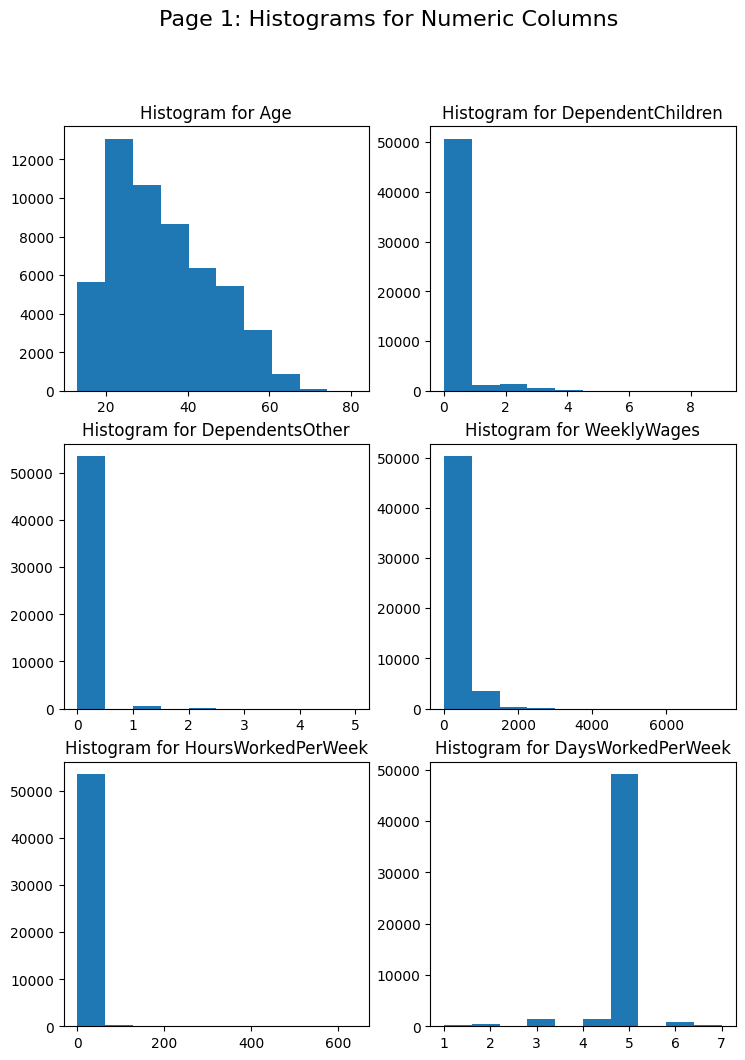

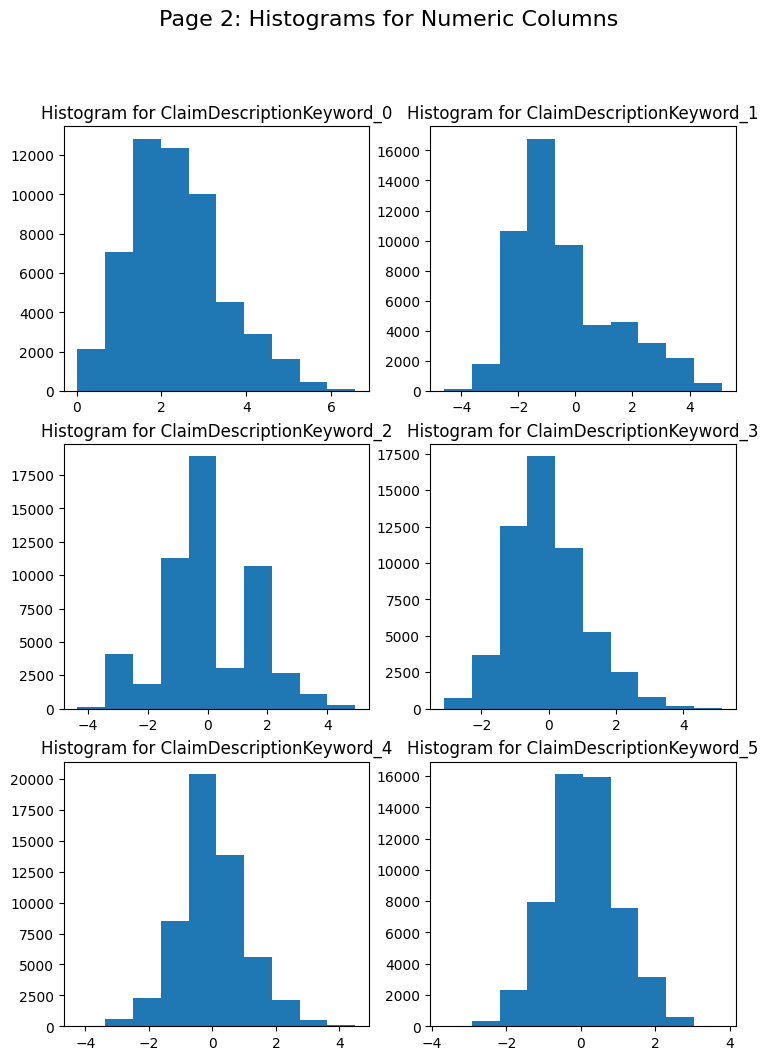

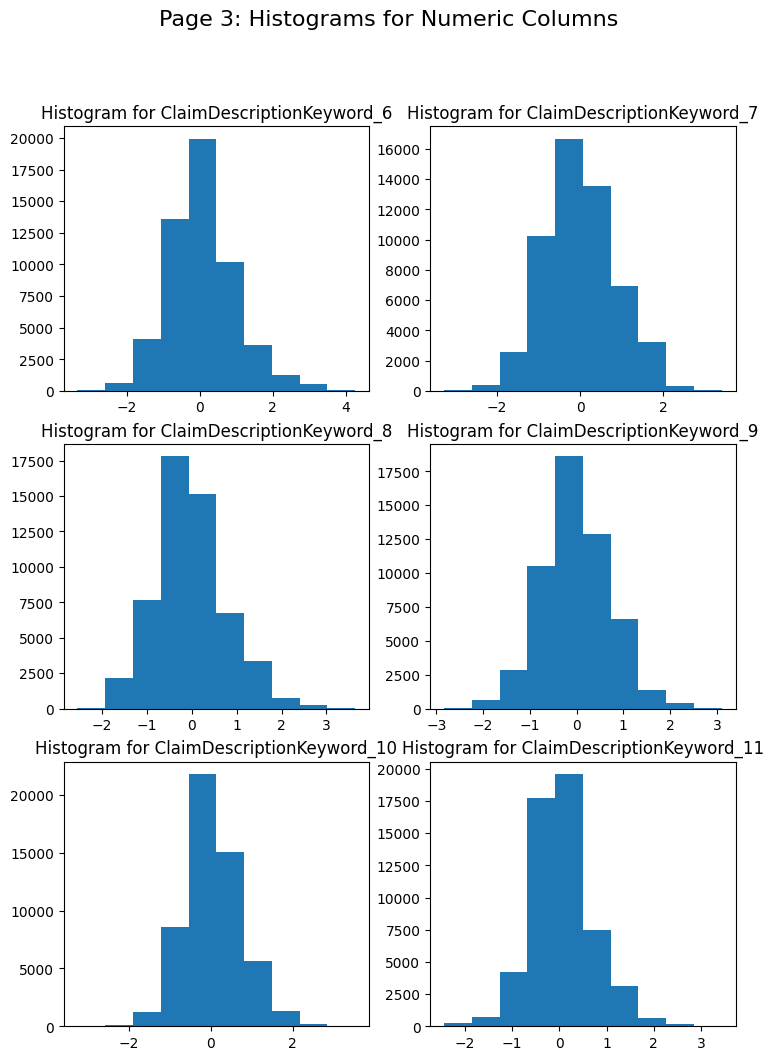

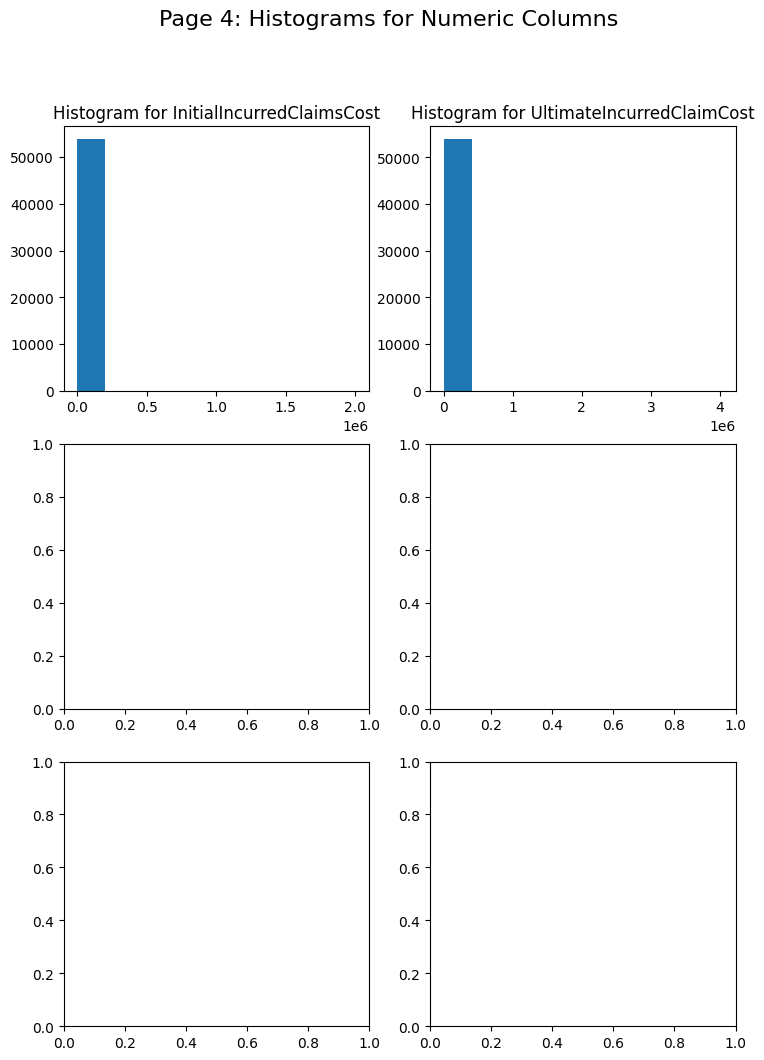

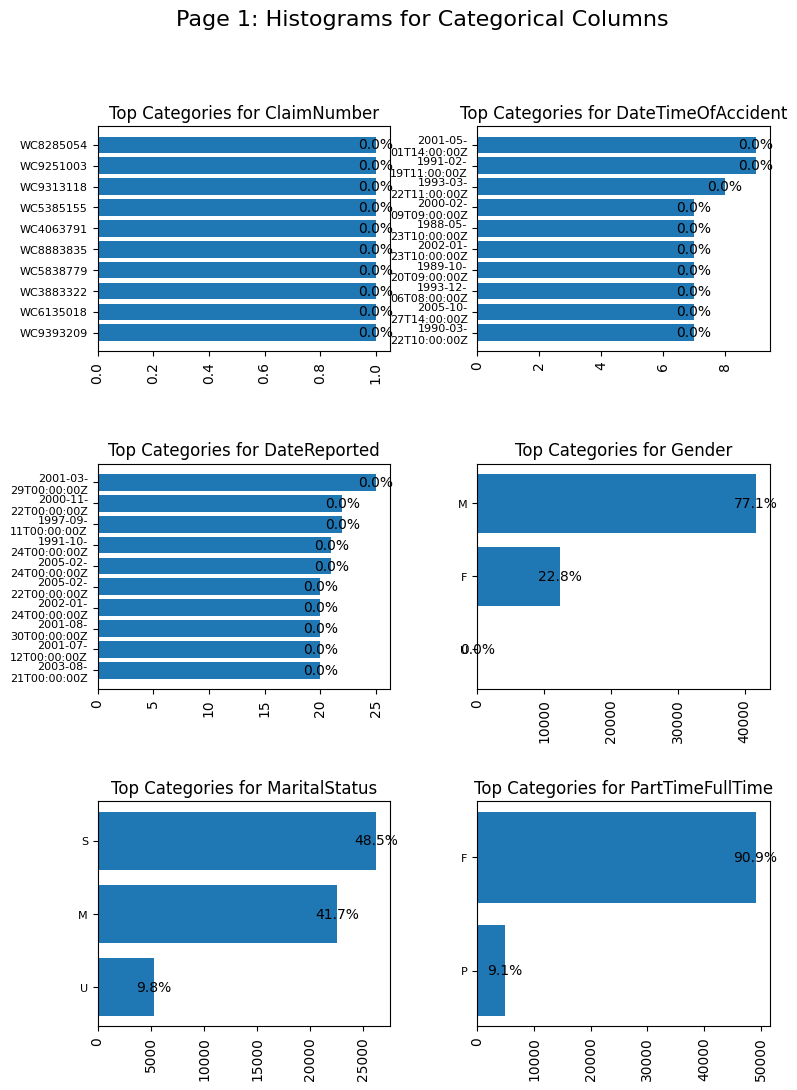

In [358]:
insurance_da.df_overview()

In [526]:
# Create log transformed claim amounts
raw_df['UltimateIncurredClaimCost_Log'] = np.log(raw_df['UltimateIncurredClaimCost'])
raw_df['InitialIncurredClaimsCost_Log'] = np.log(raw_df['InitialIncurredClaimsCost'])

In [828]:
np.percentile(raw_df['UltimateIncurredClaimCost'], 80)

10438.505732000005

Text(0.5, 1.0, 'Histogram of UltimateIncurredClaimCost < $140,000 \n (Covers ~99% of claims)')

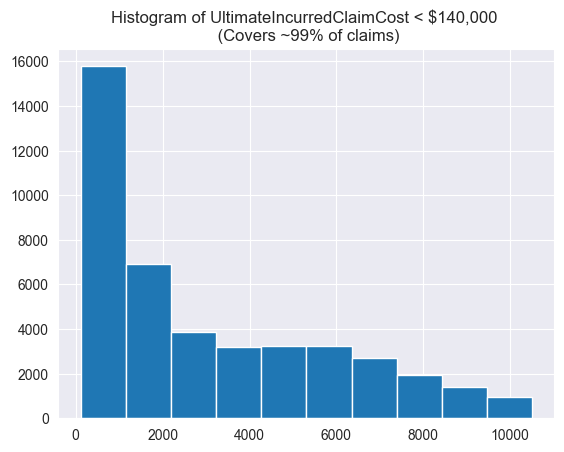

In [746]:
raw_df[raw_df['UltimateIncurredClaimCost'] < 10500]['UltimateIncurredClaimCost'].hist()
plt.title('Histogram of UltimateIncurredClaimCost < $140,000 \n (Covers ~99% of claims)')

Text(0.5, 1.0, 'Log of UltimateIncurredClaimCost')

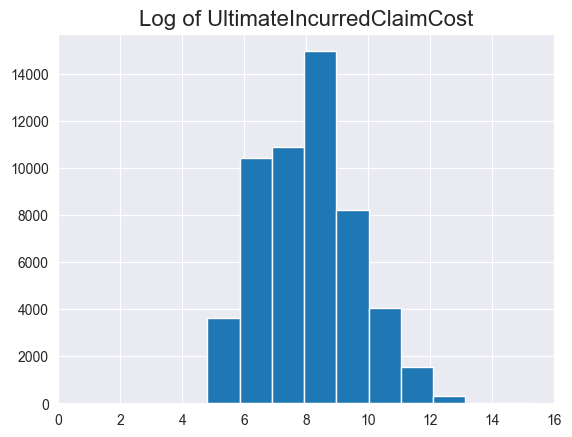

In [865]:
raw_df['UltimateIncurredClaimCost_Log'].hist()
plt.xlim(0, 16)
plt.title("Log of UltimateIncurredClaimCost", fontsize = 16)

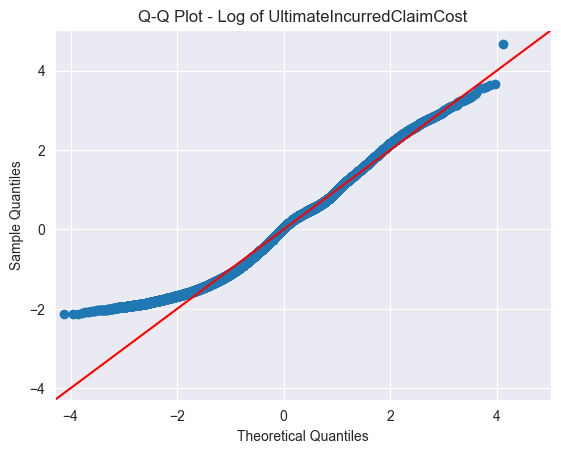

In [870]:
standardized_series = (raw_df['UltimateIncurredClaimCost_Log'] - raw_df['UltimateIncurredClaimCost_Log'].mean()) / raw_df['UltimateIncurredClaimCost_Log'].std()

sm.qqplot(standardized_series, line='45')
plt.title('Q-Q Plot - Log of UltimateIncurredClaimCost')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


Text(0.5, 1.0, 'Log of InitialIncurredClaimsCost')

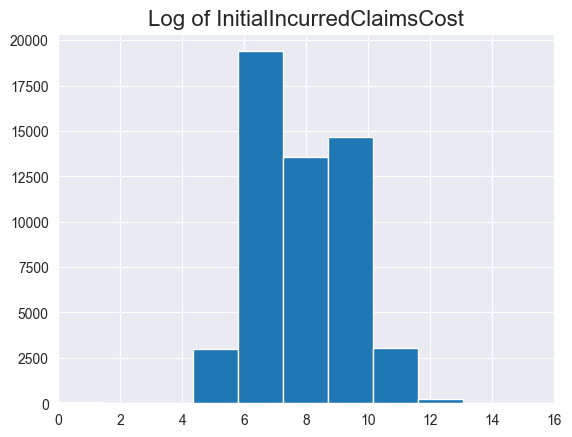

In [866]:
raw_df['InitialIncurredClaimsCost_Log'].hist()
plt.xlim(0, 16)
plt.title("Log of InitialIncurredClaimsCost", fontsize = 16)

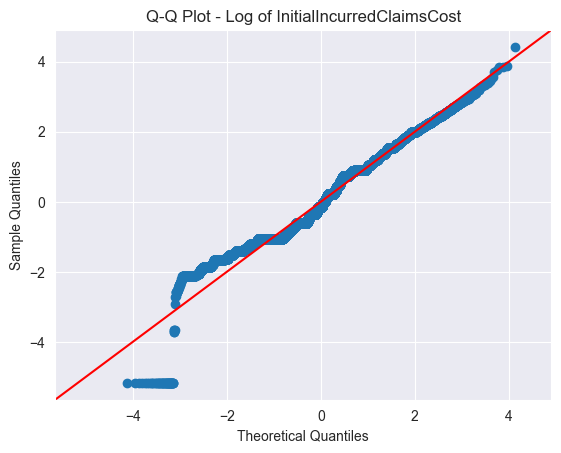

In [871]:
standardized_series = (raw_df['InitialIncurredClaimsCost_Log'] - raw_df['InitialIncurredClaimsCost_Log'].mean()) / raw_df['InitialIncurredClaimsCost_Log'].std()

sm.qqplot(standardized_series, line='45')
plt.title('Q-Q Plot - Log of InitialIncurredClaimsCost')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


## Cleaning data based on initial exploration

In [762]:
# There is one huge outlier - removing this 1 observation 
outlier_claim = \
raw_df[raw_df.UltimateIncurredClaimCost == raw_df.UltimateIncurredClaimCost.max()]['ClaimNumber'].values[0]

In [781]:
clean_df = raw_df.copy().dropna().reset_index(drop=True)
clean_df = clean_df[clean_df.ClaimNumber != outlier_claim]
clean_df.reset_index(drop=True, inplace=True)

In [782]:
print("Number of unique timestamps in DateTimeOfAccident:",
      clean_df["DateTimeOfAccident"].apply(lambda x: x[10:]).nunique())
print("Number of unique timestamps in DateReported:", clean_df["DateReported"].apply(lambda x: x[10:]).nunique())

Number of unique timestamps in DateTimeOfAccident: 24
Number of unique timestamps in DateReported: 1


This means that the granularity of DateTimeOfAccident is at Hour and that of DateReported is at Date.

In [784]:
clean_df["DateTimeOfAccident"] = raw_df["DateTimeOfAccident"].apply(
    lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))
clean_df["DateReported"] = raw_df["DateReported"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ"))

In [785]:
clean_df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost,UltimateIncurredClaimCost_Log,InitialIncurredClaimsCost_Log
0,WC8285054,2002-04-09 07:00:00,2002-07-05,48,M,M,0,0,500.00,F,...,-1.44,-0.76,-1.09,0.88,0.17,1.16,1500,4748.20,8.47,7.31
1,WC6982224,1999-01-07 11:00:00,1999-01-20,43,F,M,0,0,509.34,F,...,0.66,-0.24,-0.16,0.67,0.84,-1.31,5500,6326.29,8.75,8.61
2,WC5481426,1996-03-25 00:00:00,1996-04-14,30,M,U,0,0,709.10,F,...,-0.05,0.14,-0.34,-0.39,-0.40,-0.26,1700,2293.95,7.74,7.44
3,WC9775968,2005-06-22 13:00:00,2005-07-22,41,M,S,0,0,555.46,F,...,0.61,1.50,-0.53,-0.19,-0.86,-0.34,15000,17786.49,9.79,9.62
4,WC2634037,1990-08-29 08:00:00,1990-09-27,36,M,M,0,0,377.10,F,...,-0.81,0.24,1.03,0.37,0.43,-0.04,2800,4014.00,8.30,7.94


## Making new features

In [874]:
clean_df["DateTimeOfAccident_Hour"] = clean_df["DateTimeOfAccident"].apply(lambda x: x.hour)
clean_df["DateReported_YearMonth"] = clean_df["DateReported"].apply(lambda x: datetime.strftime(x, "%Y-%m"))
clean_df["DateTimeOfAccident_YearMonth"] = clean_df["DateTimeOfAccident"].apply(lambda x: datetime.strftime(x, "%Y-%m"))
clean_df["DateTimeOfAccident_Day_in_Week"] = clean_df["DateTimeOfAccident"].apply(lambda x: datetime.strftime(x, "%A"))
clean_df["DateTimeOfAccident_Month"] = clean_df["DateTimeOfAccident"].apply(lambda x: datetime.strftime(x, "%b"))
clean_df["Days_Between_Accident_Report"] = (clean_df["DateReported"] - clean_df["DateTimeOfAccident"]).dt.days

In [787]:
clean_df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,InitialIncurredClaimsCost,UltimateIncurredClaimCost,UltimateIncurredClaimCost_Log,InitialIncurredClaimsCost_Log,DateTimeOfAccident_Hour,DateReported_YearMonth,DateTimeOfAccident_YearMonth,DateTimeOfAccident_Day_in_Week,DateTimeOfAccident_Month,Days_Between_Accident_Report
0,WC8285054,2002-04-09 07:00:00,2002-07-05,48,M,M,0,0,500.00,F,...,1500,4748.20,8.47,7.31,7,2002-07,2002-04,Tuesday,Apr,86
1,WC6982224,1999-01-07 11:00:00,1999-01-20,43,F,M,0,0,509.34,F,...,5500,6326.29,8.75,8.61,11,1999-01,1999-01,Thursday,Jan,12
2,WC5481426,1996-03-25 00:00:00,1996-04-14,30,M,U,0,0,709.10,F,...,1700,2293.95,7.74,7.44,0,1996-04,1996-03,Monday,Mar,20
3,WC9775968,2005-06-22 13:00:00,2005-07-22,41,M,S,0,0,555.46,F,...,15000,17786.49,9.79,9.62,13,2005-07,2005-06,Wednesday,Jun,29
4,WC2634037,1990-08-29 08:00:00,1990-09-27,36,M,M,0,0,377.10,F,...,2800,4014.00,8.30,7.94,8,1990-09,1990-08,Wednesday,Aug,28


## Claim amount through time - split by filter

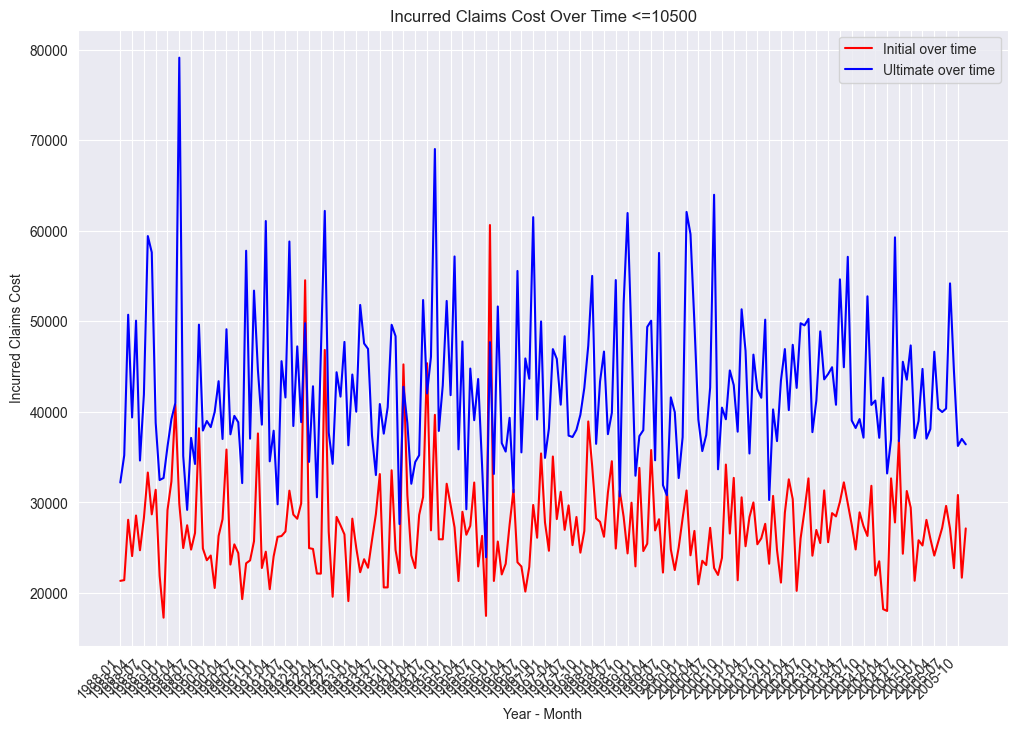

In [859]:
time_column = "DateTimeOfAccident_YearMonth"
measure = "mean"
target_suffix = ""

filters = "clean_df['UltimateIncurredClaimCost']>10500"

aggregated = clean_df[eval(filters)].groupby([time_column]).agg(
    {"ClaimNumber": "count", "InitialIncurredClaimsCost" + target_suffix: measure,
     "UltimateIncurredClaimCost" + target_suffix: measure}).reset_index(drop=False)

time_element = np.array(aggregated[time_column])
initial = np.array(aggregated["InitialIncurredClaimsCost" + target_suffix])
ultimate = np.array(aggregated["UltimateIncurredClaimCost" + target_suffix])

xs, ys, zs = zip(*sorted(zip(time_element, initial, ultimate)))
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.plot(xs, ys, label='Initial over time', color='red')
plt.plot(xs, zs, label='Ultimate over time', color='blue')
plt.legend()

# Set xticks manually to show fewer labels
step = len(xs) // 60 if len(xs) > 48 else 1  # Show 10 labels max or all if less than 10
plt.xticks(xs[::step], rotation=45, ha='right')  # Rotate for better readability
plt.ylabel("Incurred Claims Cost")
plt.xlabel("Year - Month")
plt.title("Incurred Claims Cost Over Time " + filters)
plt.show()

In [771]:
insurance_da.object_columns

['ClaimNumber',
 'DateTimeOfAccident',
 'DateReported',
 'Gender',
 'MaritalStatus',
 'PartTimeFullTime']

## Boxplots by category 

In [860]:
boxplot_by_cols = ["DateTimeOfAccident_Hour",
                   "DateTimeOfAccident_Day_in_Week",
                   "DateTimeOfAccident_Month",
                   "PartTimeFullTime",
                   "MaritalStatus",
                   "Gender",
                   ]

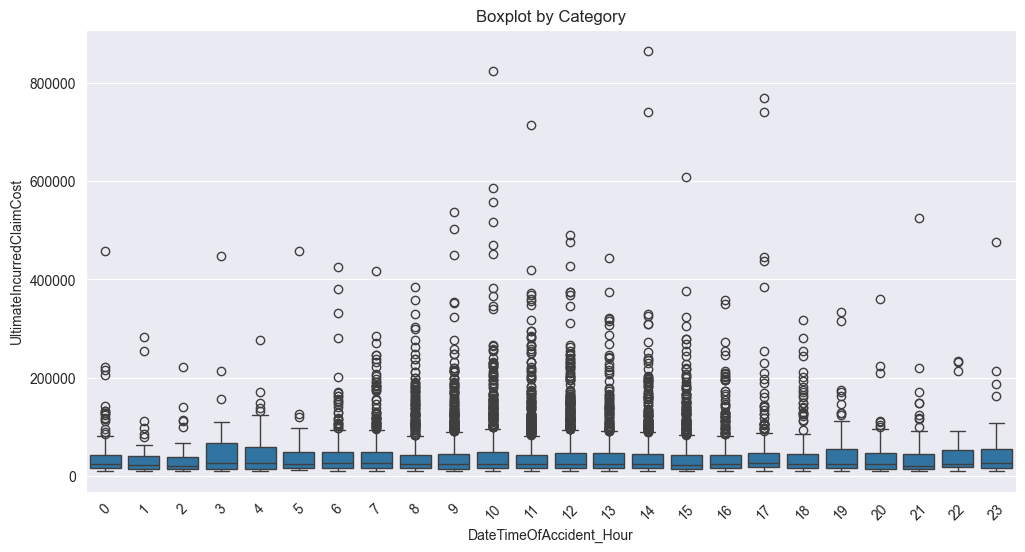

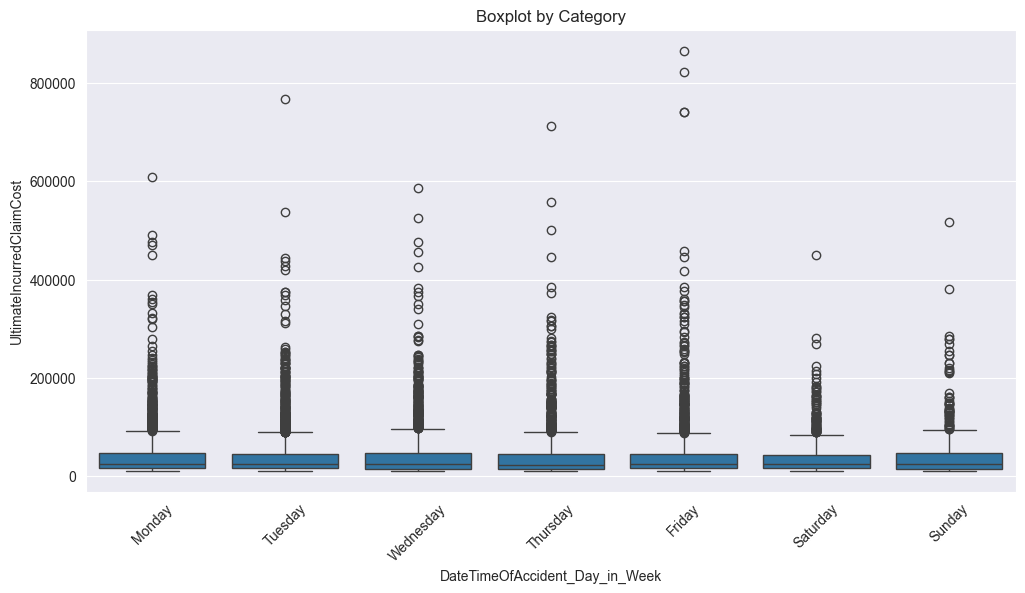

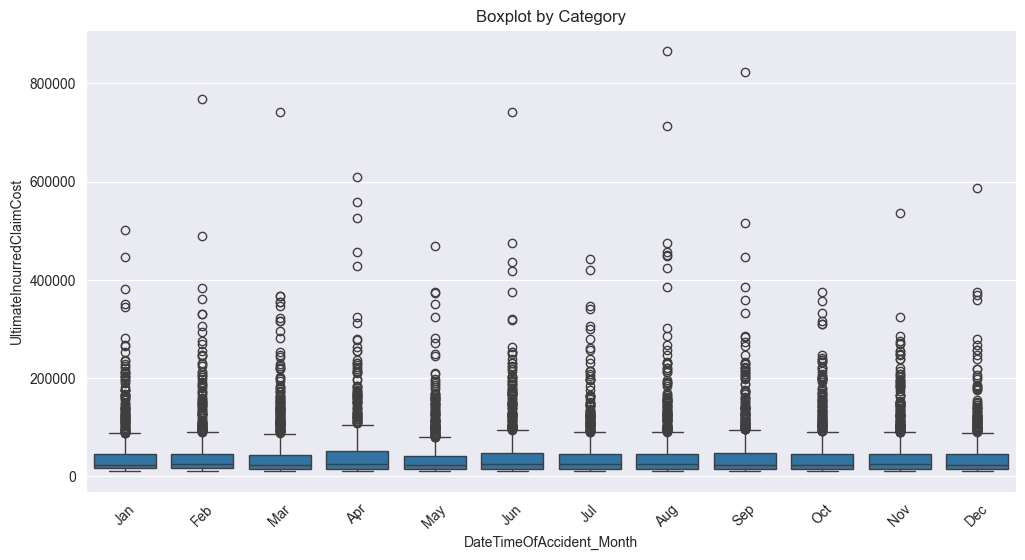

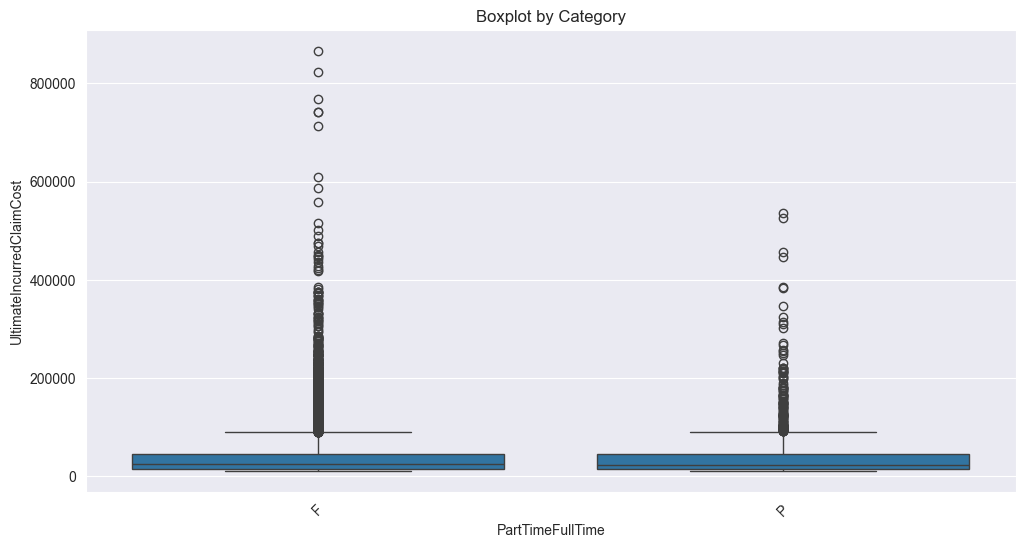

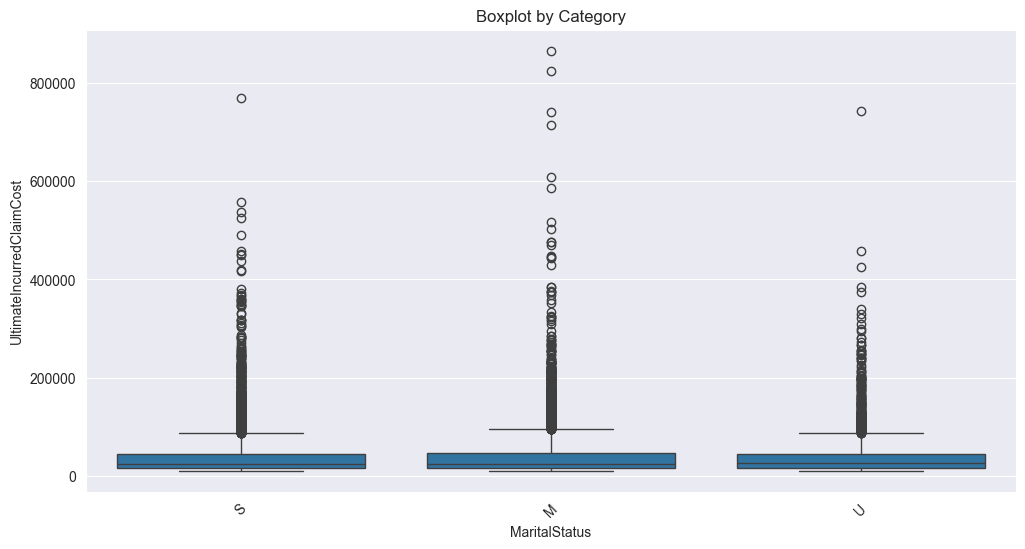

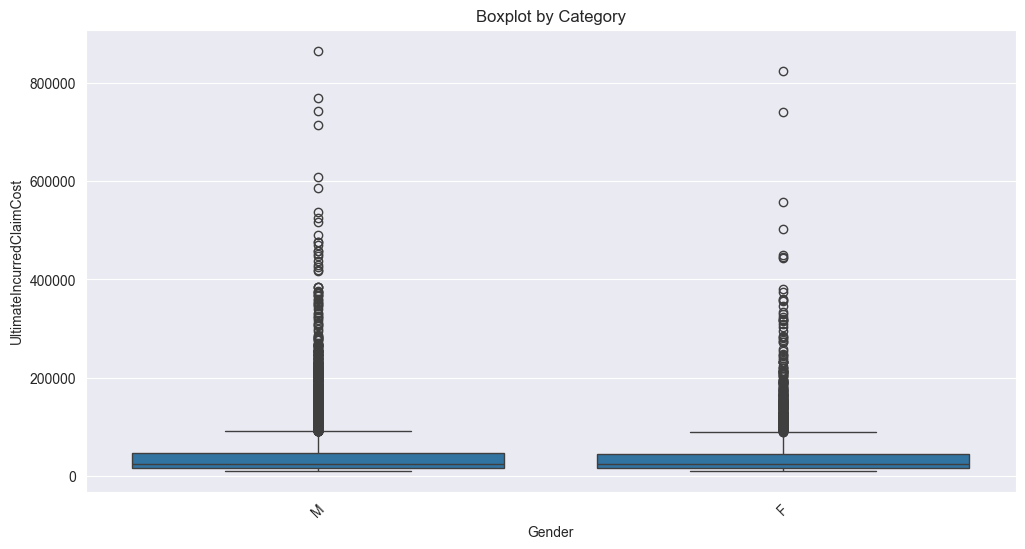

In [861]:
desired_order_month = ['Jan', 'Feb', 'Mar',
                       'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep',
                       'Oct', 'Nov', 'Dec']
desired_order_dayinweek = ["Monday", "Tuesday", "Wednesday", "Thursday",
                           "Friday", "Saturday", "Sunday"]
for by_group in boxplot_by_cols:

    plt.figure(figsize=(12, 6))

    if by_group == "DateTimeOfAccident_Month":
        sns.boxplot(x=by_group, y='UltimateIncurredClaimCost' + target_suffix,
                    data=eval("clean_df[" + filters + "]"),
                    order=desired_order_month
                    )
    elif by_group == "DateTimeOfAccident_Day_in_Week":
        sns.boxplot(x=by_group, y='UltimateIncurredClaimCost' + target_suffix,
                    data=eval("clean_df[" + filters + "]"),
                    order=desired_order_dayinweek
                    )
    else:
        sns.boxplot(x=by_group, y='UltimateIncurredClaimCost' + target_suffix,
                    data=eval("clean_df[" + filters + "]")
                    )
    plt.title('Boxplot by Category')
    plt.xlabel(by_group)
    plt.ylabel('UltimateIncurredClaimCost' + target_suffix)
    plt.xticks(rotation=45)
    plt.show()

In [932]:
# Evaluate the initial estimates
rmse_base = root_mean_squared_error(clean_df[clean_df['UltimateIncurredClaimCost']>10500]['UltimateIncurredClaimCost'], clean_df[clean_df['UltimateIncurredClaimCost']>10500]['InitialIncurredClaimsCost'])
r2_base = r2_score(clean_df[clean_df['UltimateIncurredClaimCost']>10500]['UltimateIncurredClaimCost'], clean_df[clean_df['UltimateIncurredClaimCost']>10500]['InitialIncurredClaimsCost'])

print("Original RMSE:", rmse_base)
print("Original R^2:", r2_base)

Original RMSE: 59666.125678841934
Original R^2: -0.2599942940260509


In [931]:
# Evaluate the initial estimates
rmse_base = root_mean_squared_error(clean_df[clean_df['UltimateIncurredClaimCost']<=10500]['UltimateIncurredClaimCost'], clean_df[clean_df['UltimateIncurredClaimCost']<=10500]['InitialIncurredClaimsCost'])
r2_base = r2_score(clean_df[clean_df['UltimateIncurredClaimCost']<=10500]['UltimateIncurredClaimCost'], clean_df[clean_df['UltimateIncurredClaimCost']<=10500]['InitialIncurredClaimsCost'])

print("Original RMSE:", rmse_base)
print("Original R^2:", r2_base)

Original RMSE: 2068.2446007730273
Original R^2: 0.4377641584928047


In [930]:
# Evaluate the initial estimates
rmse_base = root_mean_squared_error(clean_df['UltimateIncurredClaimCost'], clean_df['InitialIncurredClaimsCost'])
r2_base = r2_score(clean_df['UltimateIncurredClaimCost'], clean_df['InitialIncurredClaimsCost'])

print("Original RMSE:", rmse_base)
print("Original R^2:", r2_base)

Original RMSE: 26684.664629130086
Original R^2: 0.1280232187768361


In [929]:
# Evaluate the initial estimates (logged)
rmse_base = root_mean_squared_error(clean_df['UltimateIncurredClaimCost_Log'], clean_df['InitialIncurredClaimsCost_Log'])
r2_base = r2_score(clean_df['UltimateIncurredClaimCost_Log'], clean_df['InitialIncurredClaimsCost_Log'])

print("Logged RMSE:", rmse_base)
print("Logged R^2:", r2_base)

Logged MSE: 0.8486872443186824
Logged R^2: 0.6908252191856663


# Explore baseline models

In [791]:
print(clean_df.columns)

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescriptionKeyword_0', 'ClaimDescriptionKeyword_1',
       'ClaimDescriptionKeyword_2', 'ClaimDescriptionKeyword_3',
       'ClaimDescriptionKeyword_4', 'ClaimDescriptionKeyword_5',
       'ClaimDescriptionKeyword_6', 'ClaimDescriptionKeyword_7',
       'ClaimDescriptionKeyword_8', 'ClaimDescriptionKeyword_9',
       'ClaimDescriptionKeyword_10', 'ClaimDescriptionKeyword_11',
       'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
       'UltimateIncurredClaimCost_Log', 'InitialIncurredClaimsCost_Log',
       'DateTimeOfAccident_Hour', 'DateReported_YearMonth',
       'DateTimeOfAccident_YearMonth', 'DateTimeOfAccident_Day_in_Week',
       'DateTimeOfAccident_Month', 'Days_Between_Accident_Report'],
      dtype='object')


In [892]:
x_cols_numeric = [  # 'ClaimNumber', 'DateTimeOfAccident', 'DateReported',
    'Age',
    #'Gender',
    #'MaritalStatus', 
    'DependentChildren', 'DependentsOther', 'WeeklyWages',
    #'PartTimeFullTime',
    'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
    'ClaimDescriptionKeyword_0', 'ClaimDescriptionKeyword_1',
    'ClaimDescriptionKeyword_2', 'ClaimDescriptionKeyword_3',
    'ClaimDescriptionKeyword_4', 'ClaimDescriptionKeyword_5',
    'ClaimDescriptionKeyword_6', 'ClaimDescriptionKeyword_7',
    'ClaimDescriptionKeyword_8', 'ClaimDescriptionKeyword_9',
    'ClaimDescriptionKeyword_10', 'ClaimDescriptionKeyword_11',
    # 'InitialIncurredClaimsCost', 'UltimateIncurredClaimCost',
    #'DateTimeOfAccident_Date', 
    #'DateReported_YearMonth', 'DateTimeOfAccident_YearMonth',
    # 'DateTimeOfAccident_Day_in_Week',
     'Days_Between_Accident_Report',
]
x_cols_categorical = ['MaritalStatus', 'PartTimeFullTime', 'Gender',
                      'DateTimeOfAccident_Day_in_Week', 'DateTimeOfAccident_Month','DateTimeOfAccident_Hour',]
y_target = "UltimateIncurredClaimCost_Log"

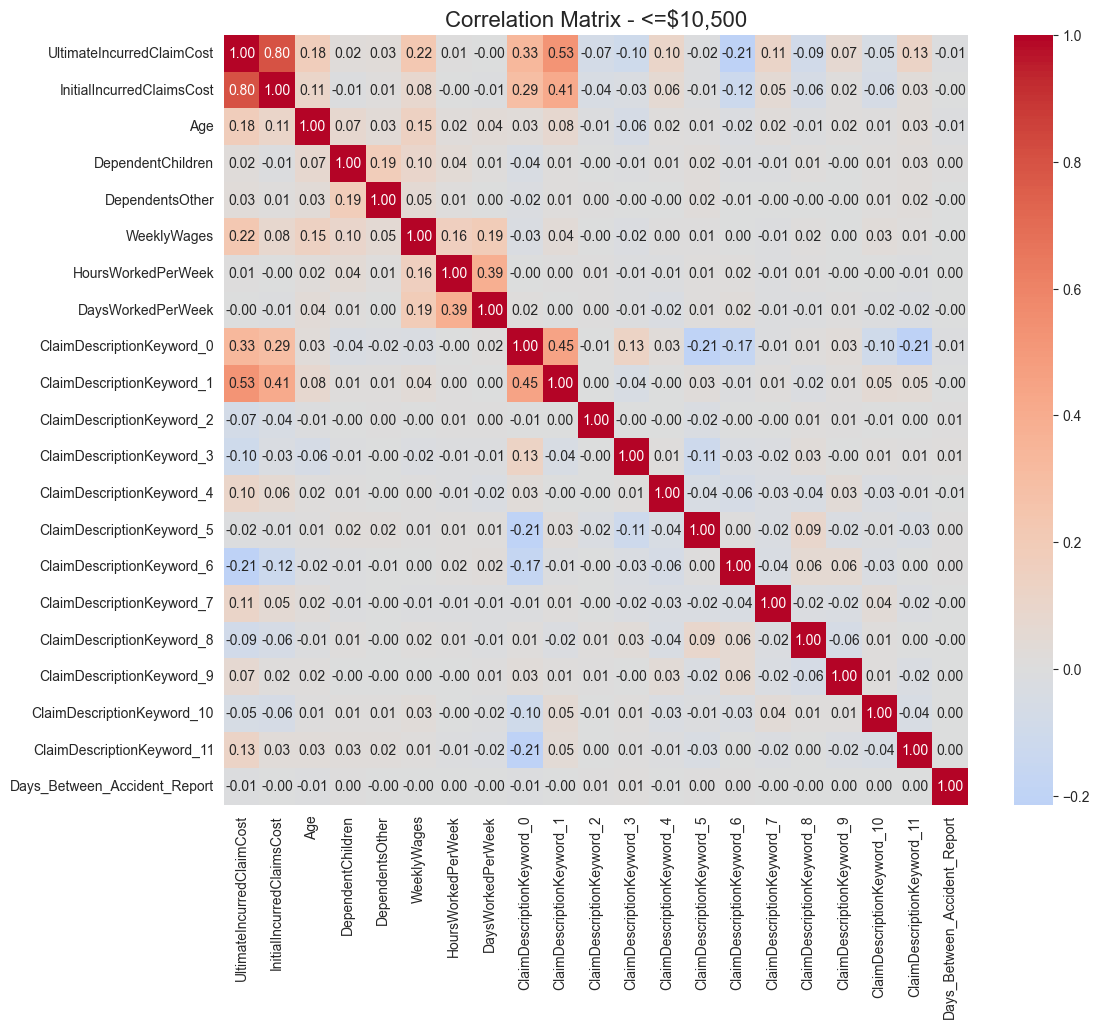

In [893]:
corr_matrix = clean_df[clean_df["UltimateIncurredClaimCost"]<=10500][["UltimateIncurredClaimCost","InitialIncurredClaimsCost"]+x_cols_numeric].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix - <=$10,500',fontsize=16)
plt.show()

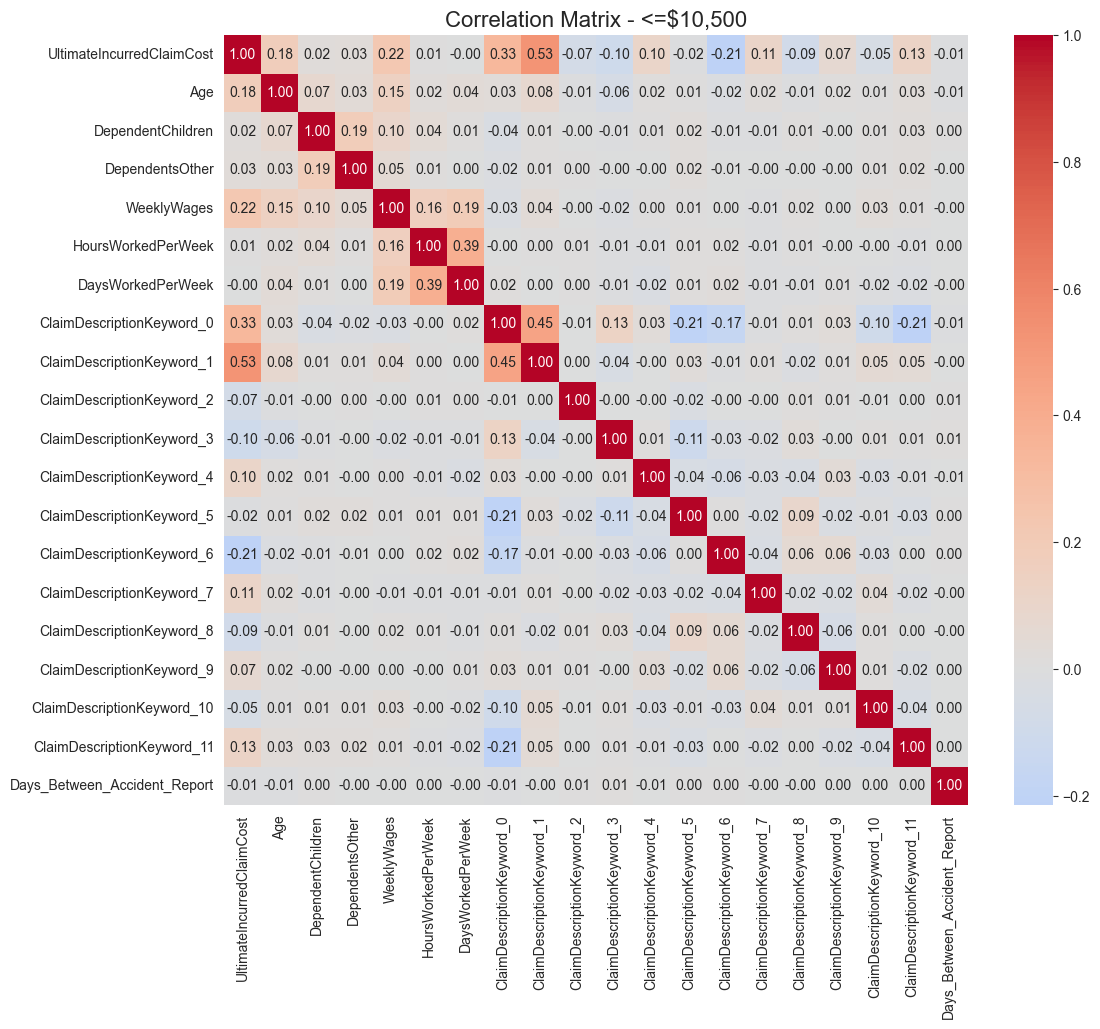

In [894]:
corr_matrix = clean_df[clean_df["UltimateIncurredClaimCost"]<=10500][["UltimateIncurredClaimCost"]+x_cols_numeric].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix - <=$10,500',fontsize=16)
plt.show()

## Encode categorical features

In [895]:
# Use one hot encoding 
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(clean_df[x_cols_categorical])
# Create a df with the encoded data
encoded_columns = encoder.get_feature_names_out(x_cols_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
# Combine the encoded df with numeric features  
x_final = pd.concat([clean_df[x_cols_numeric], encoded_df], axis=1)
x_final.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescriptionKeyword_0,ClaimDescriptionKeyword_1,ClaimDescriptionKeyword_2,ClaimDescriptionKeyword_3,...,DateTimeOfAccident_Hour_14,DateTimeOfAccident_Hour_15,DateTimeOfAccident_Hour_16,DateTimeOfAccident_Hour_17,DateTimeOfAccident_Hour_18,DateTimeOfAccident_Hour_19,DateTimeOfAccident_Hour_20,DateTimeOfAccident_Hour_21,DateTimeOfAccident_Hour_22,DateTimeOfAccident_Hour_23
0,48,0,0,500.00,38.00,5,2.25,-1.47,-1.28,-0.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,43,0,0,509.34,37.50,5,2.36,-1.26,1.49,-0.82,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,30,0,0,709.10,38.00,5,0.82,-1.09,1.52,-0.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,41,0,0,555.46,38.00,5,4.02,3.18,-0.01,1.22,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,36,0,0,377.10,38.00,5,3.38,0.01,1.69,-1.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [896]:
x_final.shape

(53970, 70)

## Explore baseline models

In [897]:
import baseline_model as bm
importlib.reload(bm)

<module 'baseline_model' from 'C:\\Users\\shiha\\workers_comp\\baseline_model.py'>

In [898]:
insurance_bm = bm.baseline_model(data=clean_df, x_cols_numeric=x_cols_numeric, x_cols_categorical=x_cols_categorical,
                                 y_target="UltimateIncurredClaimCost_Log", seed=7)
insurance_bm.fit_all()

-- Total number of rows in X: 53970
-- Total number of columns in X: 70
-- Number of rows in train: 43176
-- Number of rows in test: 10794


In [899]:
display(insurance_bm.baseline_results.sort_values("R^2 Test", ascending=False))
display(insurance_bm.feature_imp_df.sort_values("Feature_Importance", ascending=False).head(10))

,model,MSE Train,MSE Test,RMSE Train,RMSE Test,R^2 Train,R^2 Test
0,forest,0.16,1.19,0.41,1.09,0.93,0.50
0,xgb,0.75,1.20,0.87,1.10,0.67,0.50
0,regression,1.27,1.32,1.13,1.15,0.45,0.45
0,elastic,1.76,1.84,1.33,1.36,0.24,0.23
0,decision,0.00,2.45,0.00,1.57,1.00,-0.02


,Feature,Feature_Importance,Model
7,ClaimDescriptionKeyword_1,0.21,DecisionTreeRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.21,RandomForestRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.18,"XGBRegressor(base_score=None, booster=None, ca..."
3,WeeklyWages,0.14,DecisionTreeRegressor(random_state=7)
3,WeeklyWages,0.14,RandomForestRegressor(random_state=7)
12,ClaimDescriptionKeyword_6,0.11,RandomForestRegressor(random_state=7)
12,ClaimDescriptionKeyword_6,0.11,DecisionTreeRegressor(random_state=7)
12,ClaimDescriptionKeyword_6,0.08,"XGBRegressor(base_score=None, booster=None, ca..."
3,WeeklyWages,0.07,"XGBRegressor(base_score=None, booster=None, ca..."
9,ClaimDescriptionKeyword_3,0.06,RandomForestRegressor(random_state=7)


In [900]:
insurance_bm_raw = bm.baseline_model(data=clean_df, x_cols_numeric=x_cols_numeric,
                                     x_cols_categorical=x_cols_categorical,
                                     y_target="UltimateIncurredClaimCost",
                                     seed=7)
insurance_bm_raw.fit_all()

-- Total number of rows in X: 53970
-- Total number of columns in X: 70
-- Number of rows in train: 43176
-- Number of rows in test: 10794


In [917]:
display(insurance_bm_raw.baseline_results.sort_values("R^2 Test", ascending=False))
display(insurance_bm_raw.feature_imp_df.sort_values("Feature_Importance", ascending=False).head(10))

,model,MSE Train,MSE Test,RMSE Train,RMSE Test,R^2 Train,R^2 Test
0,regression,748372397.58,772510605.92,27356.40,27794.08,0.08,0.08
0,elastic,752406880.34,777668015.57,27430.04,27886.70,0.07,0.07
0,forest,110144997.59,797838583.73,10495.00,28246.04,0.86,0.05
0,xgb,305048861.48,813526082.16,17465.65,28522.38,0.62,0.03
0,decision,0.00,1681534548.98,0.00,41006.52,1.00,-1.00


,Feature,Feature_Importance,Model
3,WeeklyWages,0.10,RandomForestRegressor(random_state=7)
3,WeeklyWages,0.09,DecisionTreeRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.07,RandomForestRegressor(random_state=7)
12,ClaimDescriptionKeyword_6,0.06,DecisionTreeRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.06,DecisionTreeRegressor(random_state=7)
0,Age,0.06,DecisionTreeRegressor(random_state=7)
13,ClaimDescriptionKeyword_7,0.05,DecisionTreeRegressor(random_state=7)
17,ClaimDescriptionKeyword_11,0.05,RandomForestRegressor(random_state=7)
18,Days_Between_Accident_Report,0.05,RandomForestRegressor(random_state=7)
0,Age,0.05,RandomForestRegressor(random_state=7)


In [927]:
display(insurance_bm_raw.feature_imp_df.sort_values("Feature_Importance", ascending=False).head(15))

,Feature,Feature_Importance,Model
3,WeeklyWages,0.10,RandomForestRegressor(random_state=7)
3,WeeklyWages,0.09,DecisionTreeRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.07,RandomForestRegressor(random_state=7)
12,ClaimDescriptionKeyword_6,0.06,DecisionTreeRegressor(random_state=7)
7,ClaimDescriptionKeyword_1,0.06,DecisionTreeRegressor(random_state=7)
0,Age,0.06,DecisionTreeRegressor(random_state=7)
13,ClaimDescriptionKeyword_7,0.05,DecisionTreeRegressor(random_state=7)
17,ClaimDescriptionKeyword_11,0.05,RandomForestRegressor(random_state=7)
18,Days_Between_Accident_Report,0.05,RandomForestRegressor(random_state=7)
0,Age,0.05,RandomForestRegressor(random_state=7)


# XGBoost

In [482]:
import xgboost as xgb

In [807]:
y_target_final = "UltimateIncurredClaimCost"

In [804]:
print(y_target)
X_train, X_test, Y_train_log, Y_test_log = train_test_split(x_final,
                                                            clean_df["UltimateIncurredClaimCost_Log"],
                                                            test_size=0.2,
                                                            random_state=7)
X_train, X_test, Y_train, Y_test = train_test_split(x_final,
                                                    clean_df["UltimateIncurredClaimCost"],
                                                    test_size=0.2,
                                                    random_state=7)

X_train, X_test, Y_train_initial, Y_test_initial = train_test_split(x_final,
                                                                    clean_df['InitialIncurredClaimsCost'],
                                                                    test_size=0.2,
                                                                    random_state=7)

UltimateIncurredClaimCost_Log


## XGBoost on full data

In [926]:
# Create the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=7)

# Fit the model on the training data
model.fit(x_final, clean_df["UltimateIncurredClaimCost"])

# Predict on the test set
Y_pred_all = model.predict(x_final)

# Evaluate the model on full 
rmse = root_mean_squared_error(clean_df["UltimateIncurredClaimCost"], Y_pred_all)
r2 = r2_score(clean_df["UltimateIncurredClaimCost"], Y_pred_all)

print(f"Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Evaluate handlers' estimate z
rmse = root_mean_squared_error(clean_df["UltimateIncurredClaimCost"], clean_df['InitialIncurredClaimsCost'])
r2 = r2_score(clean_df["UltimateIncurredClaimCost"], clean_df['InitialIncurredClaimsCost'])
print(f"Mean Squared Error - Handlers': {rmse}")
print(f"R^2 Score - Handlers': {r2}")


Mean Squared Error: 12538.1905812154
R^2 Score: 0.8074909474825673
Mean Squared Error - Handlers': 26684.664629130086
R^2 Score - Handlers': 0.1280232187768361


Same XGBoost for train and test:

In [921]:
# Create the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=7)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_test = model.predict(X_test)

# Evaluate the model on test set
rmse = root_mean_squared_error(Y_test, Y_pred_test)
r2 = r2_score(Y_test, Y_pred_test)

print(f"Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Evaluate the model on train
Y_pred_train = model.predict(X_train)
rmse = root_mean_squared_error(Y_train, Y_pred_train)
r2 = r2_score(Y_train, Y_pred_train)

print(f"Mean Squared Error - Train: {rmse}")
print(f"R^2 Score - Train: {r2}")

Mean Squared Error: 29486.29136682998
R^2 Score: -0.03568682054806316
Mean Squared Error - Train: 11020.191472816561
R^2 Score - Train: 0.8502294761079381


## XGBoost tuning - to avoid overfitting

In [514]:
from sklearn.model_selection import GridSearchCV

In [922]:
# Parameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Grid search
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=7)
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Evaluate the model on test set
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}
Mean Squared Error: 755707021.7432775
R^2 Score: 0.09979462456364585


In [934]:
# Use the best parameters from above
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=7,
                         colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.9)

model.fit(x_final, clean_df[y_target_final])

# Predict on the test set
Y_pred_all = model.predict(x_final)

# Evaluate the model on full data
rmse = root_mean_squared_error(clean_df[y_target_final], Y_pred_all)
r2 = r2_score(clean_df[y_target_final], Y_pred_all)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Evaluate handlers' estimate 
rmse = root_mean_squared_error(clean_df[y_target_final], clean_df['InitialIncurredClaimsCost'])
r2 = r2_score(clean_df[y_target_final], clean_df['InitialIncurredClaimsCost'])
print(f"Root Mean Squared Error - Handlers': {rmse}")
print(f"R^2 Score - Handlers': {r2}")


Root Mean Squared Error: 25726.70151679661
R^2 Score: 0.18950630922849965
Root Mean Squared Error - Handlers': 26684.664629130086
R^2 Score - Handlers': 0.1280232187768361


# Other explorations

## GLM

In [928]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

train_df = pd.concat([X_train, Y_train], axis=1)

# Define the formula for the GLM
formula = 'UltimateIncurredClaimCost ~ ' + "+".join(list(X_train.columns))

# Use gamma distribution 
model_gamma = glm(formula=formula, data=train_df, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(model_gamma.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     UltimateIncurredClaimCost   No. Observations:                43176
Model:                                   GLM   Df Residuals:                    43133
Model Family:                          Gamma   Df Model:                           42
Link Function:                           log   Scale:                          7.7604
Method:                                 IRLS   Log-Likelihood:            -4.5574e+05
Date:                       Tue, 18 Jun 2024   Deviance:                       74209.
Time:                               13:53:06   Pearson chi2:                 3.35e+05
No. Iterations:                          100   Pseudo R-squ. (CS):            0.09064
Covariance Type:                   nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------